In [1]:
%load_ext autoreload
%autoreload 2


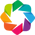

In [2]:
import sys
sys.path.append('/Users/chstansbury/PyCharmProjects/python-arpes/')

import numpy as np
import pandas as pd
from arpes.config import SOURCE_PATH
import os.path
import matplotlib.pyplot as plt
%matplotlib notebook

import holoviews as hv
import holoviews.util
hv.extension('bokeh')

from arpes.config import SOURCE_PATH
from arpes.utilities import clean_xlsx_dataset

In [41]:
ds = clean_xlsx_dataset(os.path.join(SOURCE_PATH, 'datasets/MoWTe2/20170725_MoWTe2.xlsx'))

In [12]:
from arpes.io import load_dataset
from arpes.utilities.conversion import convert_to_kspace

In [43]:
delay_scan = load_dataset(ds.loc['f00058', ('id',)]).sum('cycle', keep_attrs=True)

/Users/chstansbury/PyCharmProjects/python-arpes/arpes/io.py:116: UserWarning: Could not fetch cleave information.
  warnings.warn('Could not fetch cleave information.')


In [83]:
delay_scan_k = convert_to_kspace(delay_scan, {'kp': 0.005})

<IPython.core.display.Javascript object>


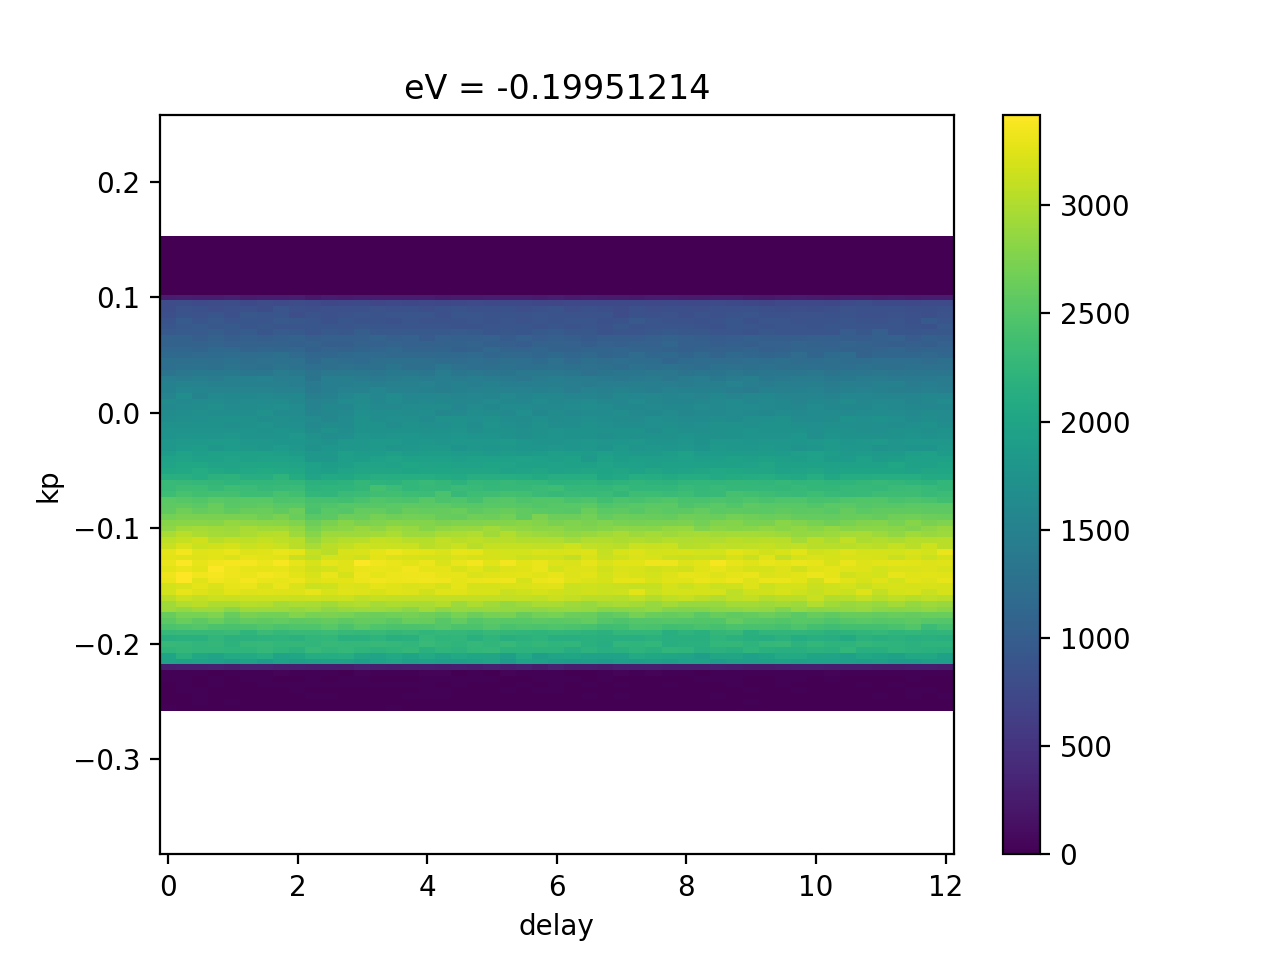

In [84]:
delay_scan_k.sel(eV=-0.2, method='nearest').plot()

<IPython.core.display.Javascript object>


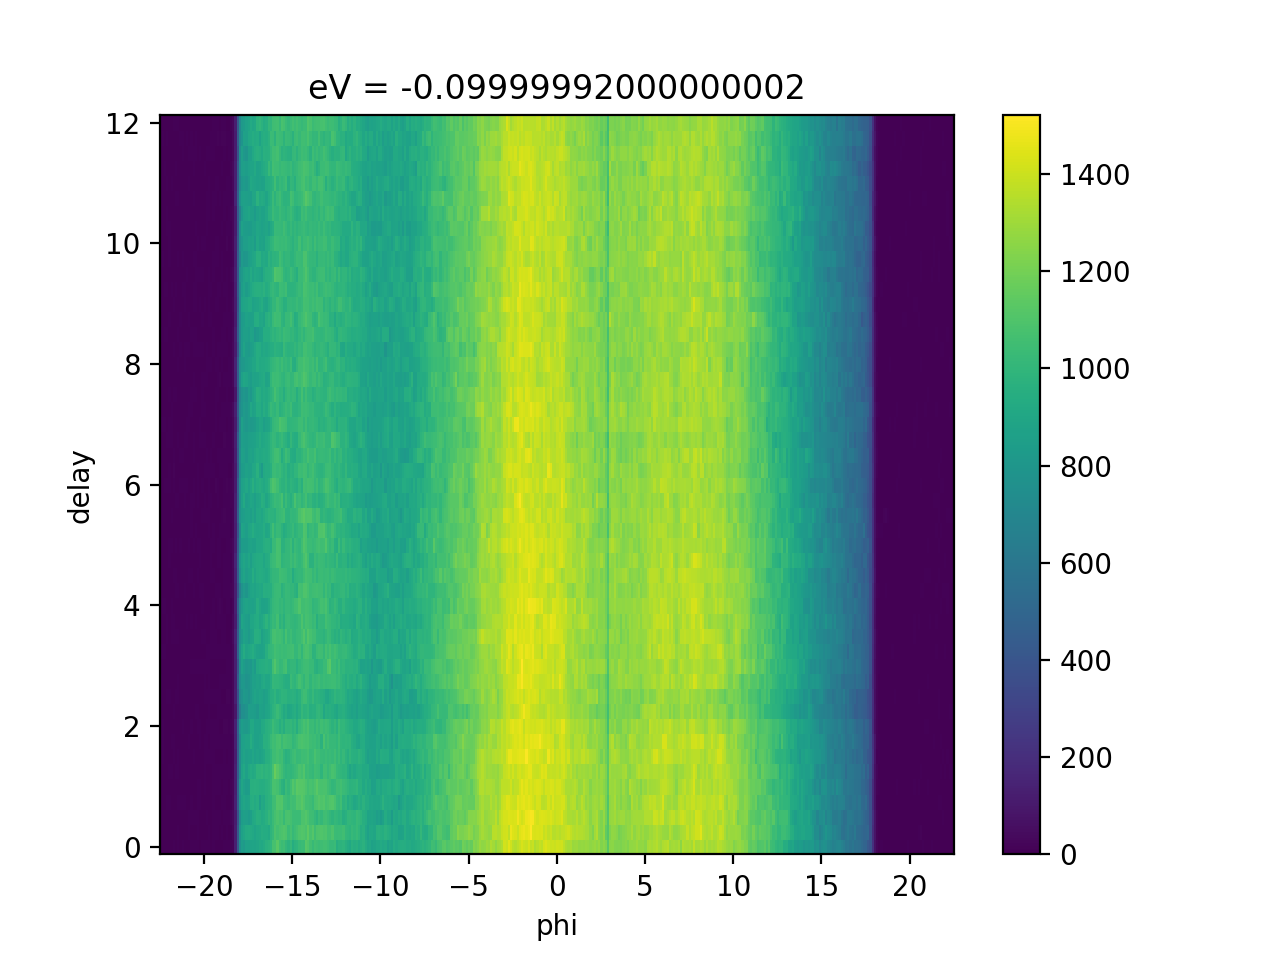

In [59]:
delay_scan.sel(eV=-0.1, method='nearest').plot()

# Collect and convert the files we are interested in

Cuts including Gamma are f00075 - f00084

Cuts across the pocket are f00056 - f00059, f00033, f00035, f00016 - f00030

## Including Gamma

In [90]:
f75 = load_dataset(ds.loc['f00075', ('id',)]).sum('cycle', keep_attrs=True)

/Users/chstansbury/PyCharmProjects/python-arpes/arpes/io.py:116: UserWarning: Could not fetch cleave information.
  warnings.warn('Could not fetch cleave information.')


In [101]:
fs = {}
fs[75] = f75

<IPython.core.display.Javascript object>


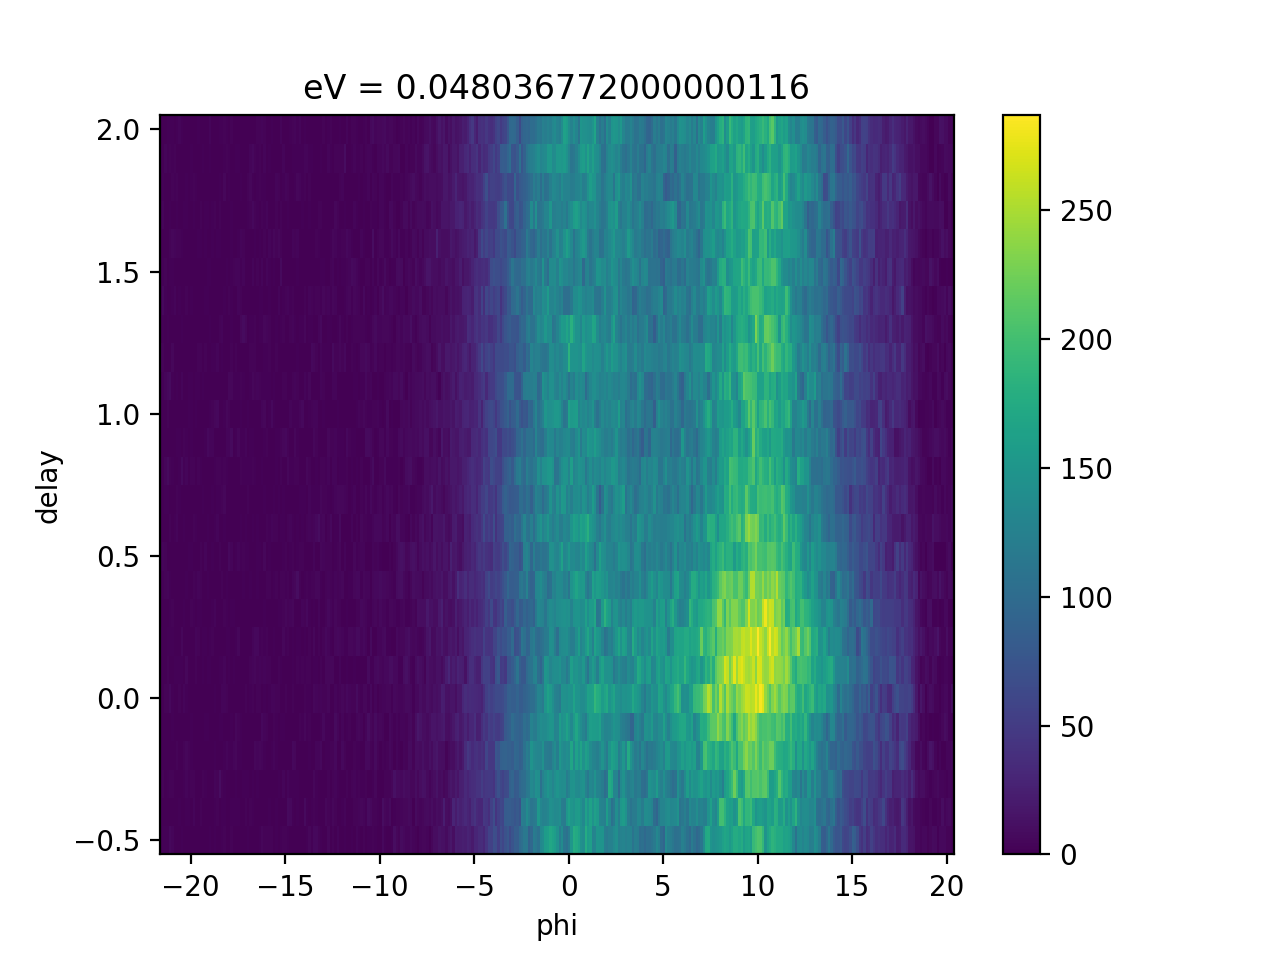

In [117]:
f75.sel(eV=0.05, method='nearest').plot()

In [102]:
for i in range(75, 85):
    fs[i] = load_dataset(ds.loc['f000%g' % i, ('id',)])

/Users/chstansbury/PyCharmProjects/python-arpes/arpes/io.py:116: UserWarning: Could not fetch cleave information.
  warnings.warn('Could not fetch cleave information.')


In [106]:
fs = {k: v.sum('cycle', keep_attrs=True) if 'cycle' in v.dims else v for k, v in fs.items()}

In [108]:
fs = {k: convert_to_kspace(v, {'kp': 0.005}) if 'phi' in v.dims else v for k, v in fs.items()}

/Users/chstansbury/PyCharmProjects/python-arpes/arpes/utilities/conversion/__init__.py:140: RuntimeWarning: invalid value encountered in arcsin
  polar_angle * np.pi / 180)) + phi_offset(self.arr)
/Users/chstansbury/anaconda/envs/python_arpes/lib/python3.5/site-packages/scipy/interpolate/interpolate.py:2469: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
/Users/chstansbury/anaconda/envs/python_arpes/lib/python3.5/site-packages/scipy/interpolate/interpolate.py:2470: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]


In [306]:
import holoviews as hv
images = [hv.Image(v.sel(eV=0, method='nearest'), label=str(k)) for k, v in fs.items()]
hv.Layout(images).cols(3)

:Layout
   .Image.A_80 :Image   [delay,kp]   (z)
   .Image.A_81 :Image   [delay,kp]   (z)
   .Image.A_82 :Image   [delay,kp]   (z)
   .Image.A_83 :Image   [delay,kp]   (z)
   .Image.A_84 :Image   [delay,kp]   (z)
   .Image.A_75 :Image   [delay,kp]   (z)
   .Image.A_76 :Image   [delay,kp]   (z)
   .Image.A_77 :Image   [delay,kp]   (z)
   .Image.A_78 :Image   [delay,kp]   (z)
   .Image.A_79 :Image   [delay,kp]   (z)

<IPython.core.display.Javascript object>


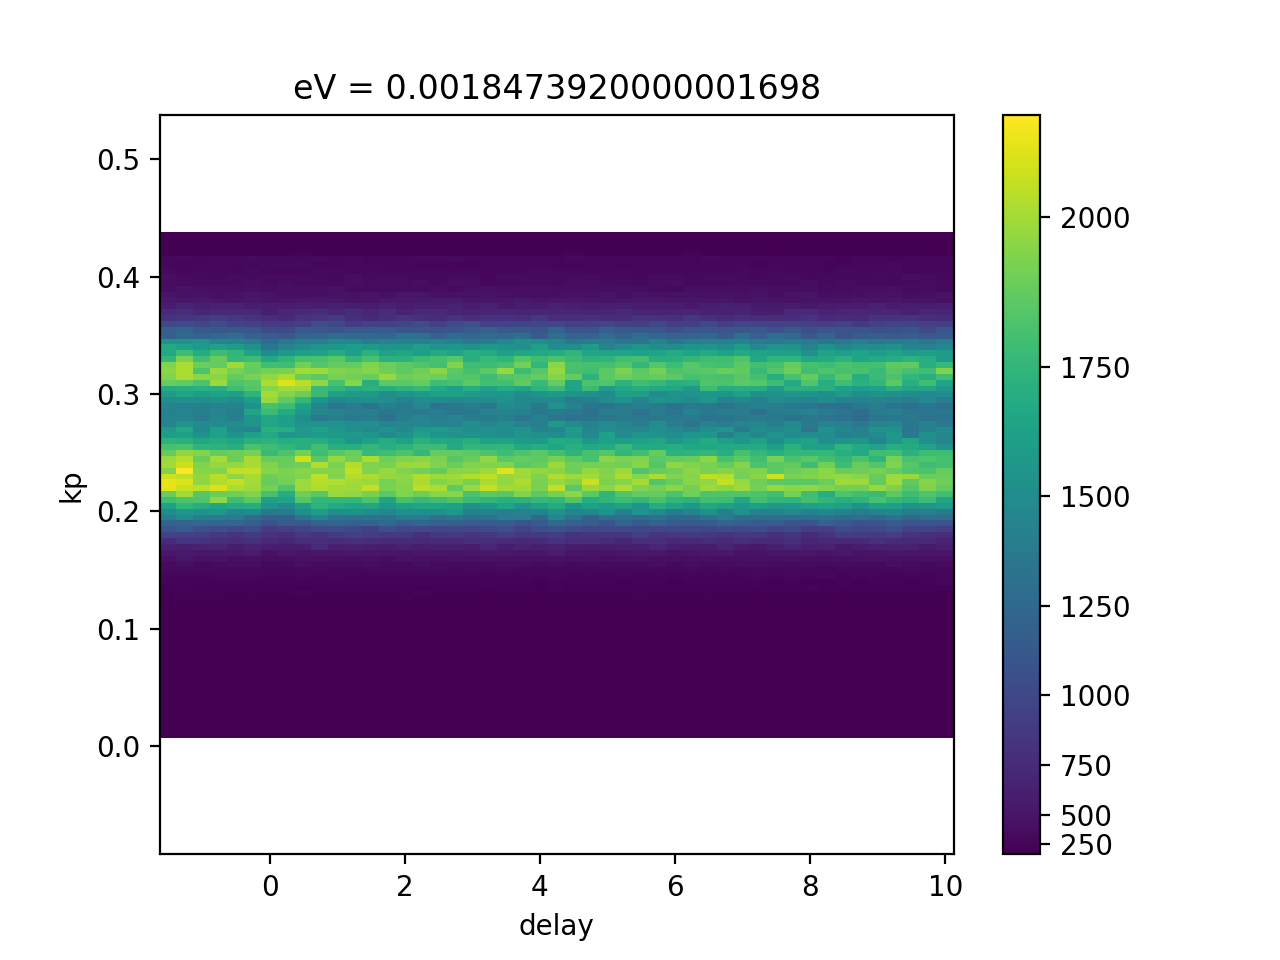

In [159]:
from matplotlib import colors
fs[81].sel(eV=0, method='nearest').plot(norm=colors.PowerNorm(gamma=2.0))

<IPython.core.display.Javascript object>


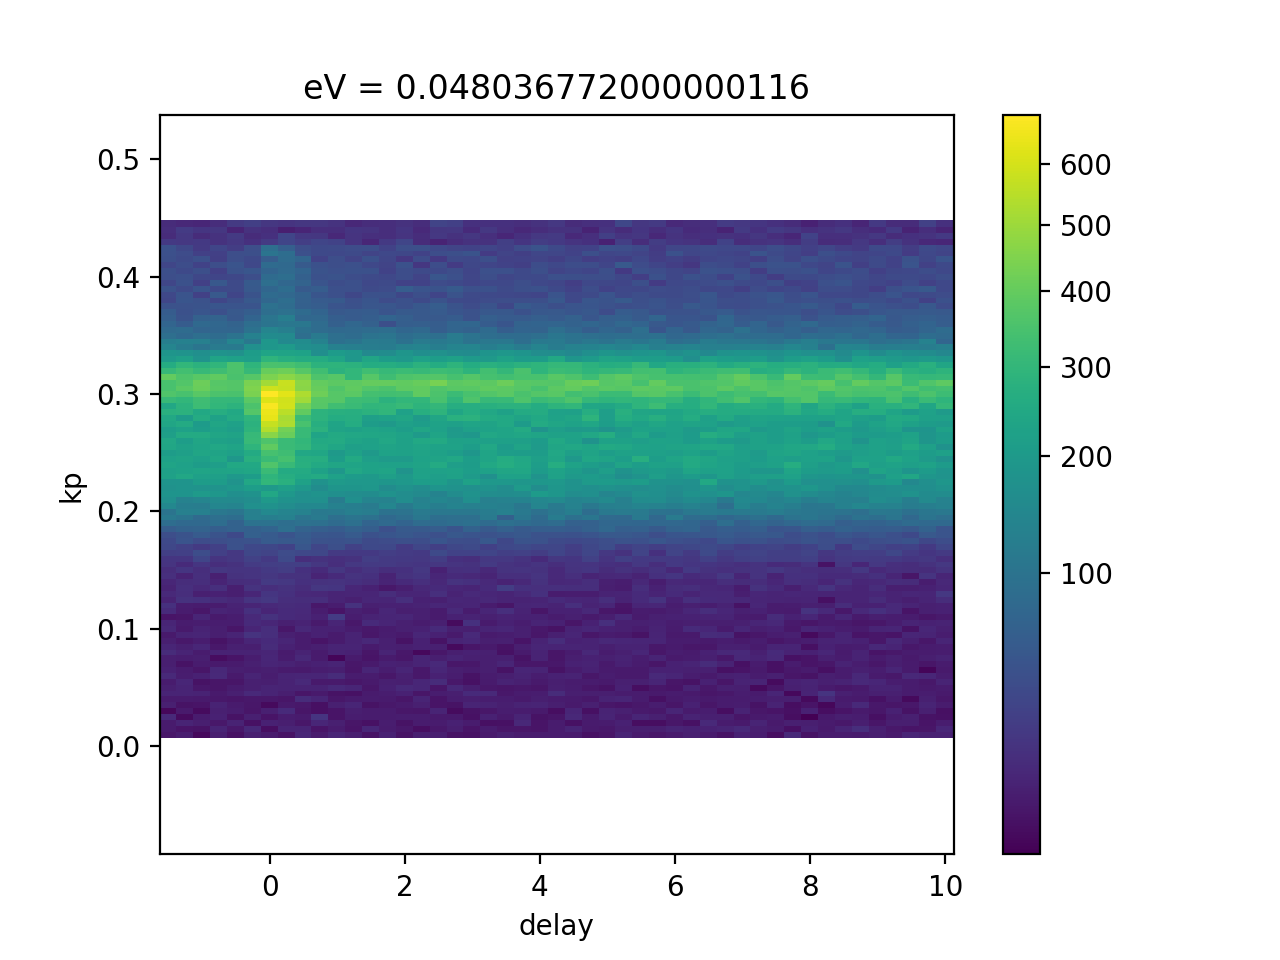

In [168]:
fs[81].sel(eV=0.05, method='nearest').plot(norm=colors.PowerNorm(gamma=0.5))

<IPython.core.display.Javascript object>


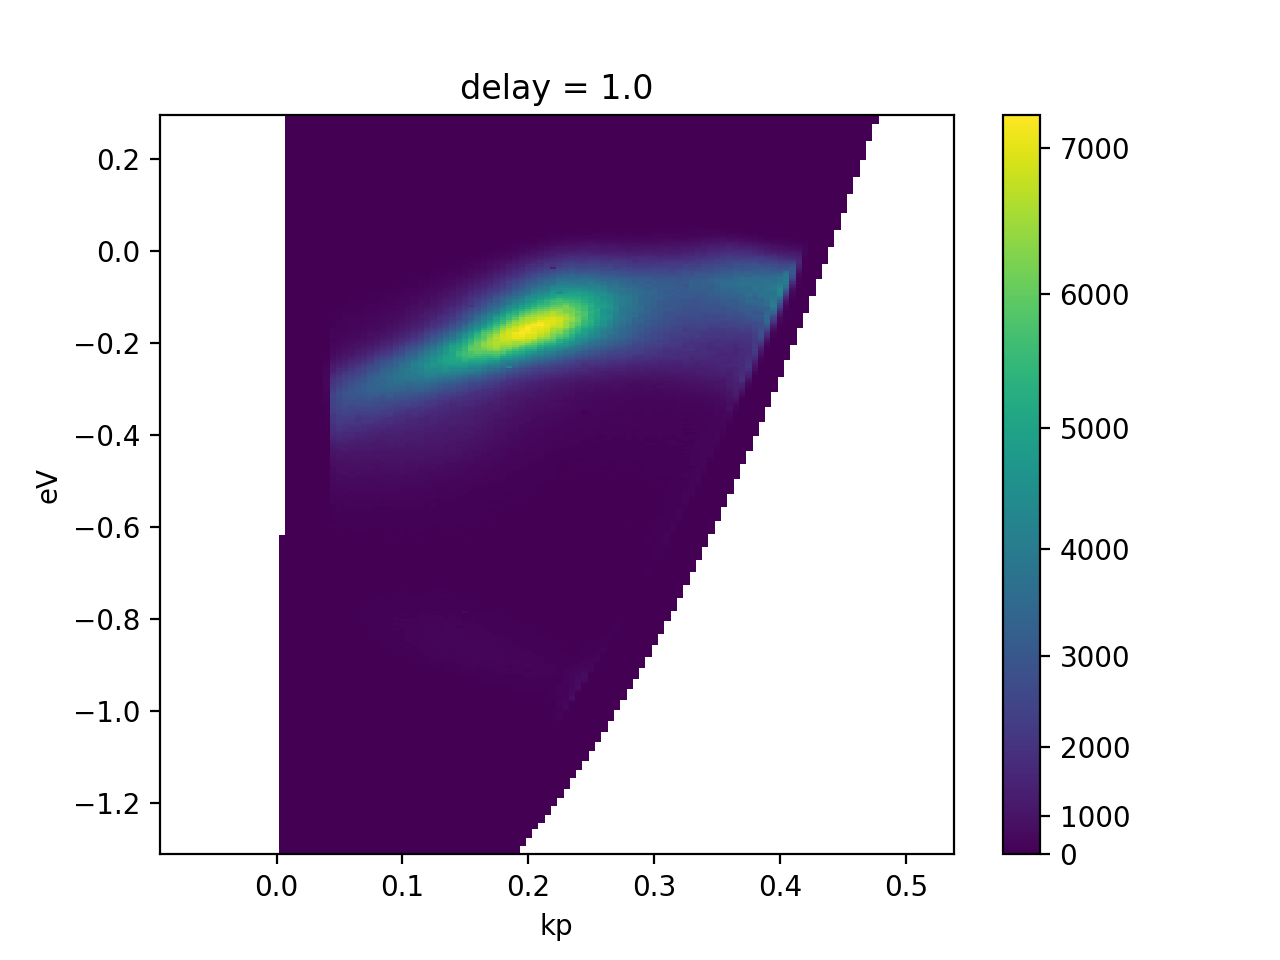

In [193]:
fs[80].sel(delay=1, method='nearest').plot(norm=colors.PowerNorm(gamma=1.5))

<IPython.core.display.Javascript object>


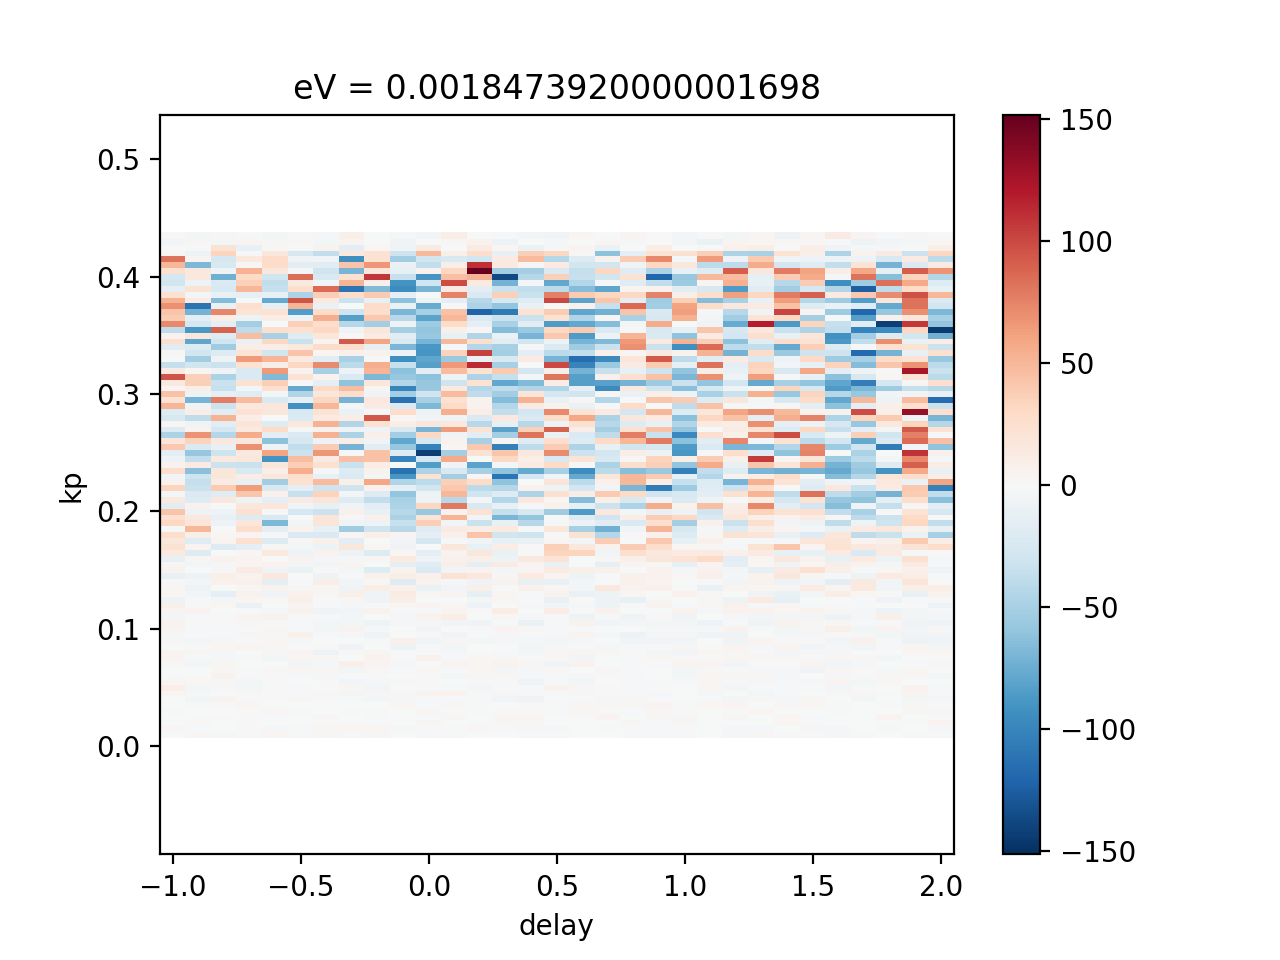

In [192]:
early80 = fs[80].sel(delay=slice(-1, -0.2))
(fs[80] - (early80.sum('delay') / early80.coords['delay'].shape[0])).sel(eV=0, method='nearest').plot()

In [ ]:
# Probe polarization seems to demonstrate we are only picking things up with p polarization

<IPython.core.display.Javascript object>


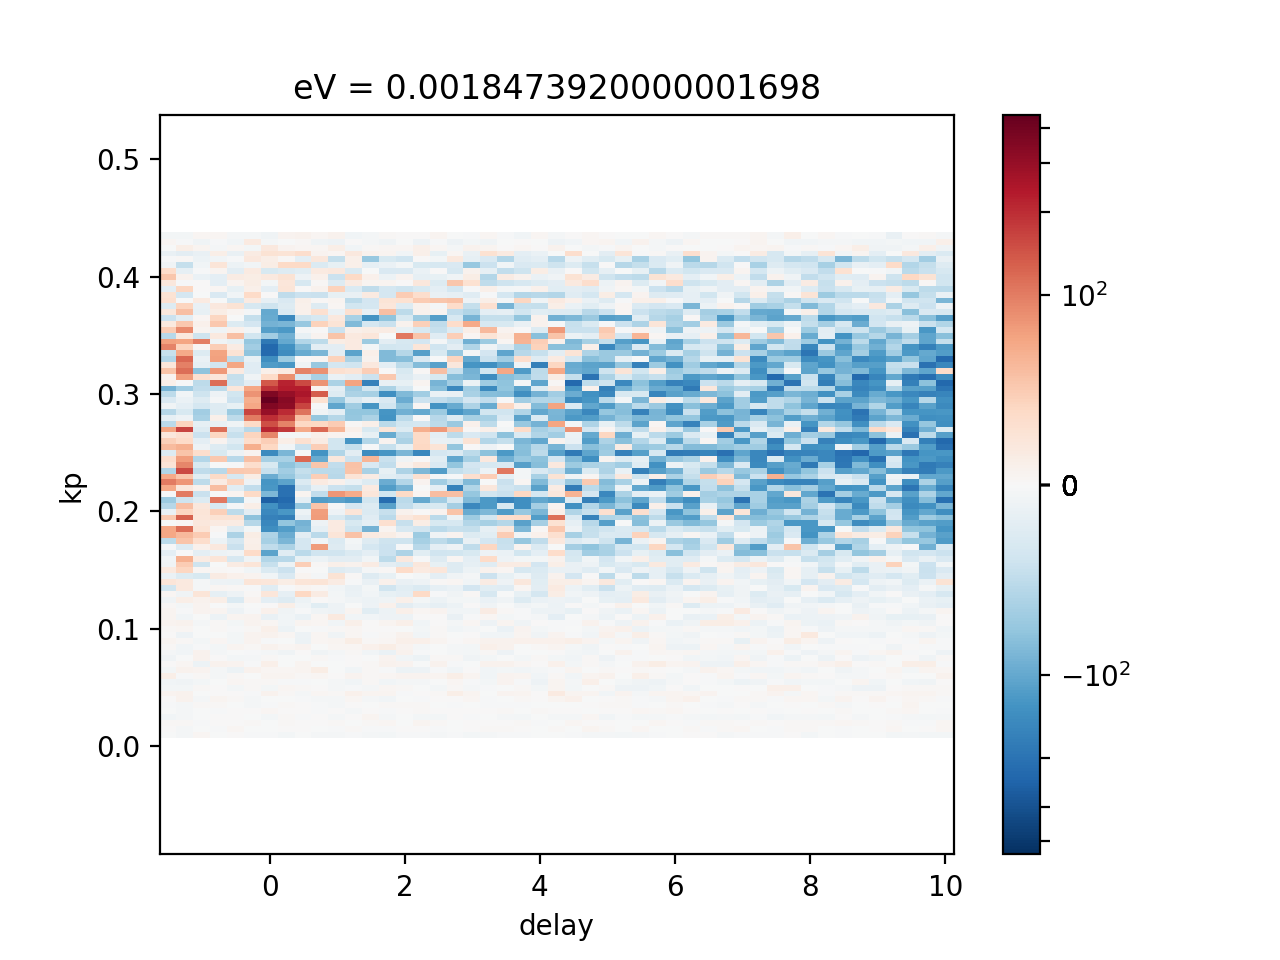

In [203]:
early81 = fs[81].sel(delay=slice(-1, -0.2))
(fs[81] - (early81.sum('delay') / early81.coords['delay'].shape[0])).sel(eV=0, method='nearest').plot(
norm=colors.SymLogNorm(100))

## Questions to Answer

1. Is there evidence of surface charging? This might be visible in the location of the Fermi level. From the below this seems like it might be happening, can see if the frequency matches that that we see in the shift in the pocket size
2. Is the pocket size changing over time?
3. Is there evidence of transient surface states after the pump?
4. Can we be sure we are not sensitive to SPV effect? We should take more PuPr measurements long before t0, also a measurement with pump blocked 

<IPython.core.display.Javascript object>


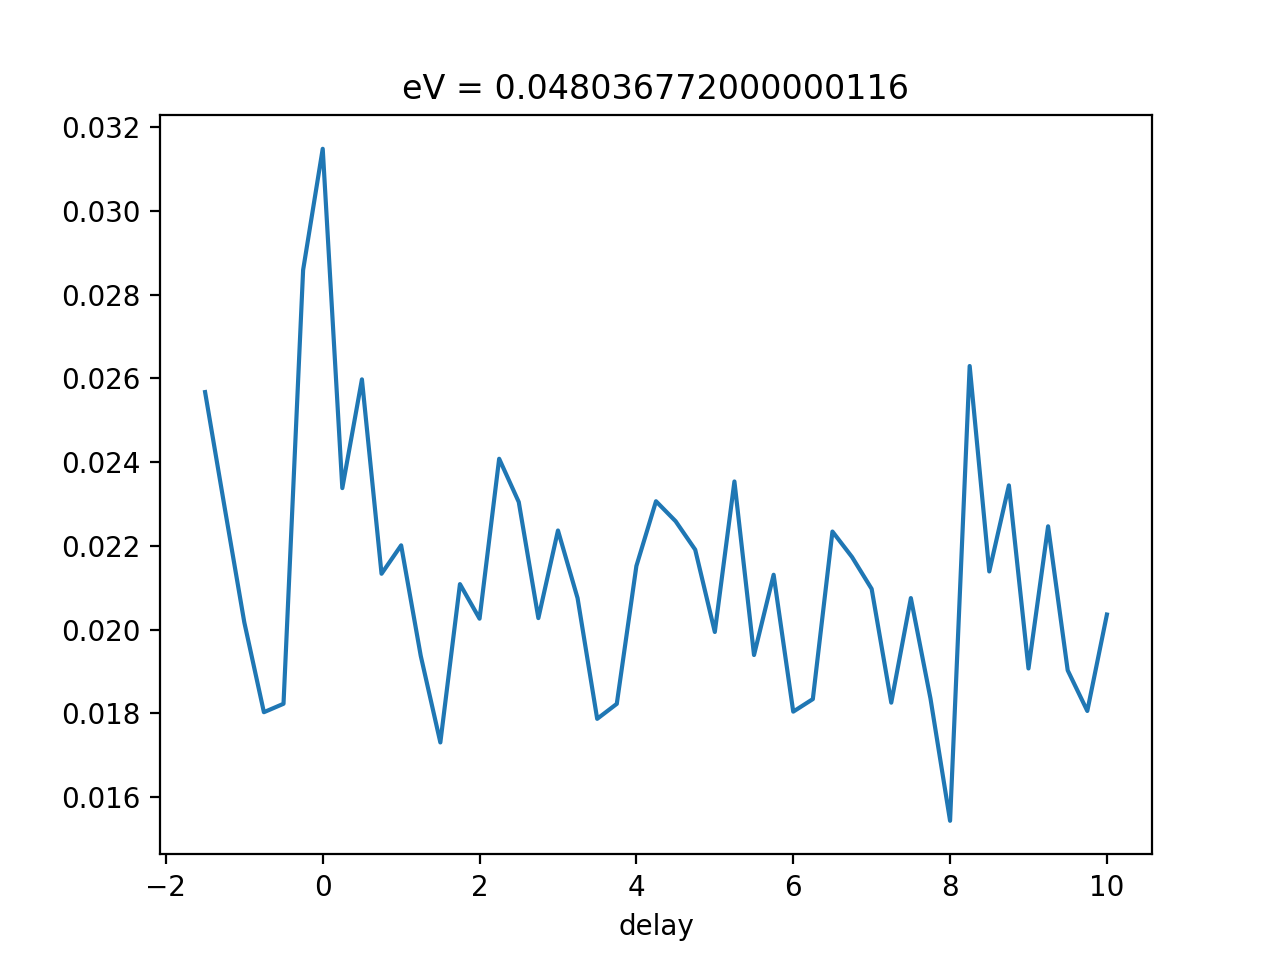

In [259]:
ef_test = fs[81].sel(kp=slice(0.04, 0.1)).sum('kp').sel(eV=slice(-0.2, 0.1))
(ef_test / ef_test.sum('delay')).sel(eV=0.05, method='nearest').plot()

<IPython.core.display.Javascript object>


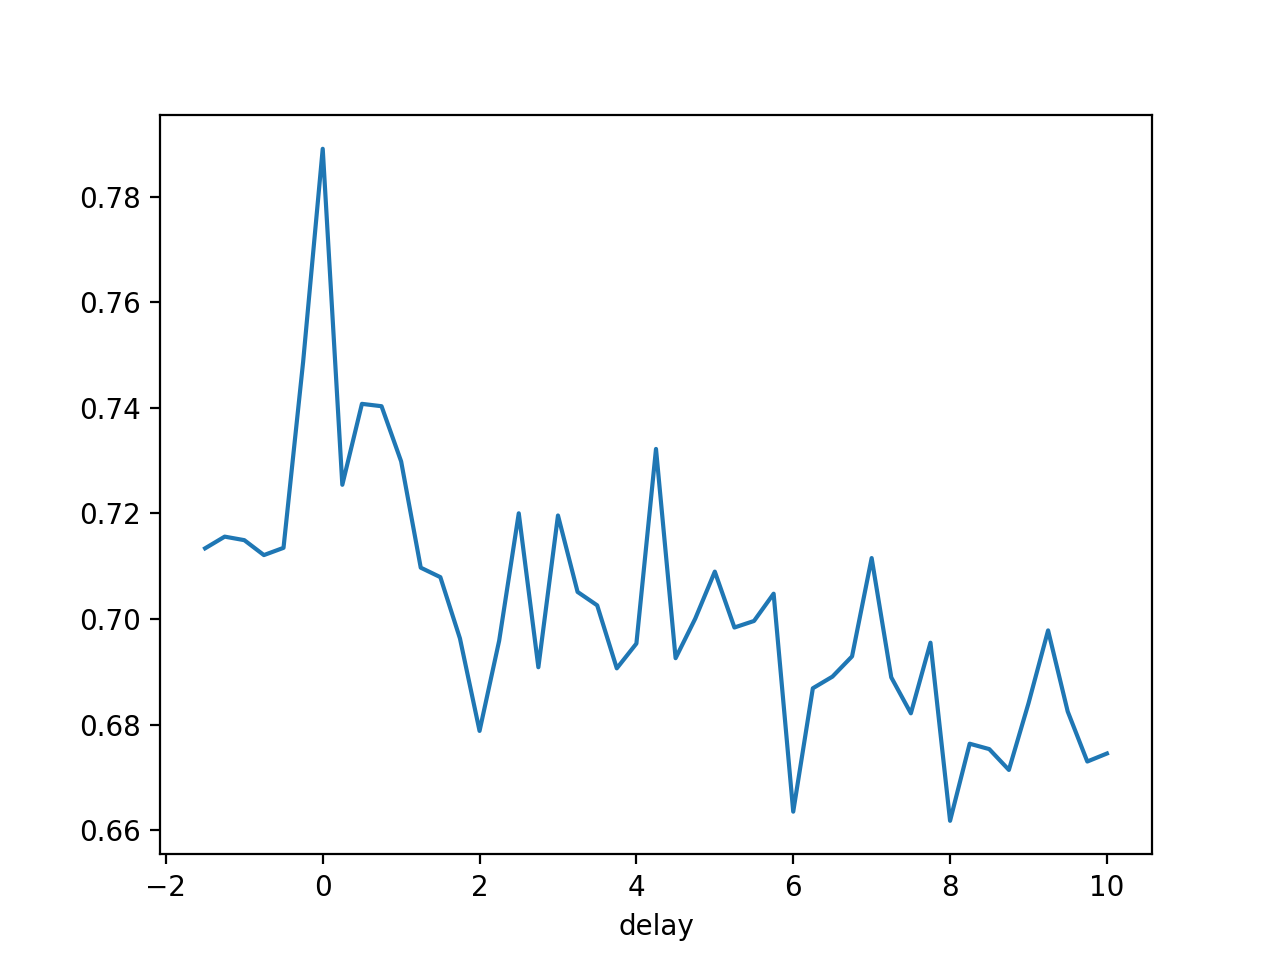

In [262]:
ef_test = fs[81].sel(kp=slice(0.04, 0.1)).sum('kp')
(ef_test / ef_test.sum('delay')).sel(eV=slice(-0.1, 0.05)).sum('eV').plot()

<IPython.core.display.Javascript object>


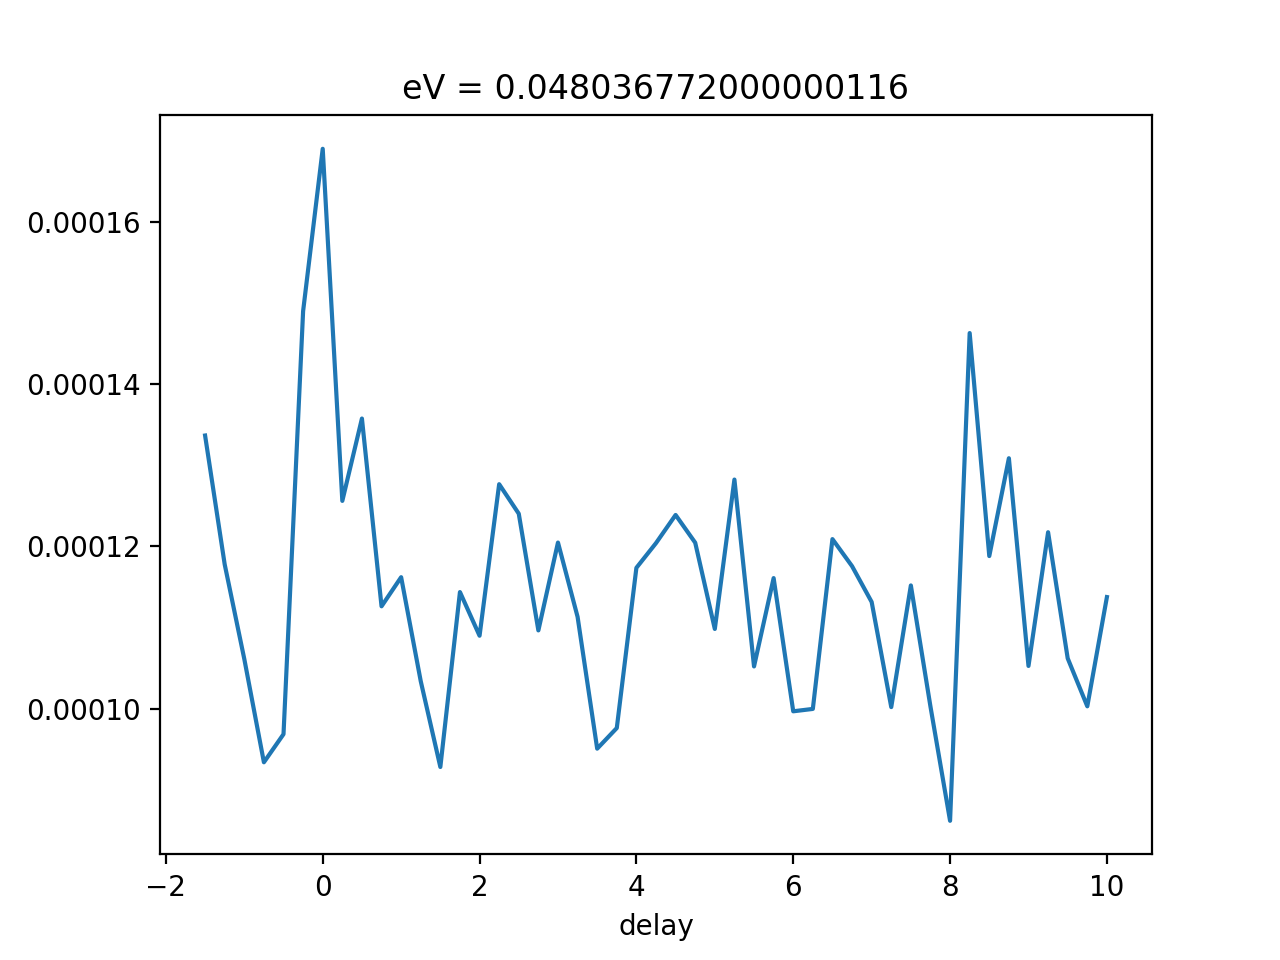

In [263]:
ef_test = fs[81].sel(kp=slice(0.04, 0.1)).sum('kp').sel(eV=slice(-0.2, 0.1))
(ef_test / ef_test.sum('eV')).sel(eV=0.05, method='nearest').plot()

<IPython.core.display.Javascript object>


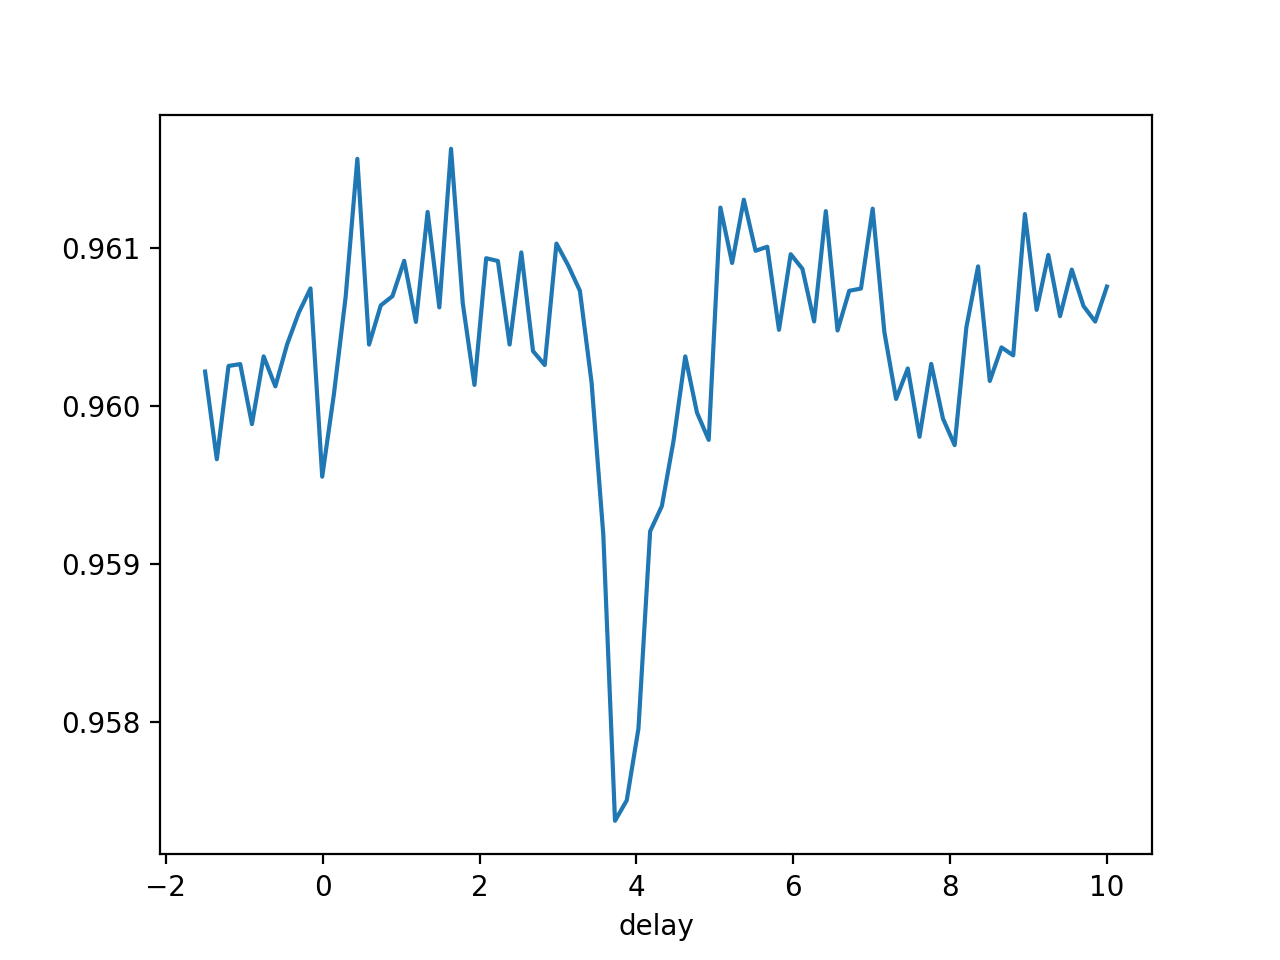

In [289]:
ef_test = fs[84].sel(kp=slice(0.04, 0.1)).sum('kp').sel(eV=slice(-0.2, 0.2))
(ef_test / ef_test.sum('eV')).sel(eV=slice(-0.2, -0.05)).sum('eV').plot()

<IPython.core.display.Javascript object>


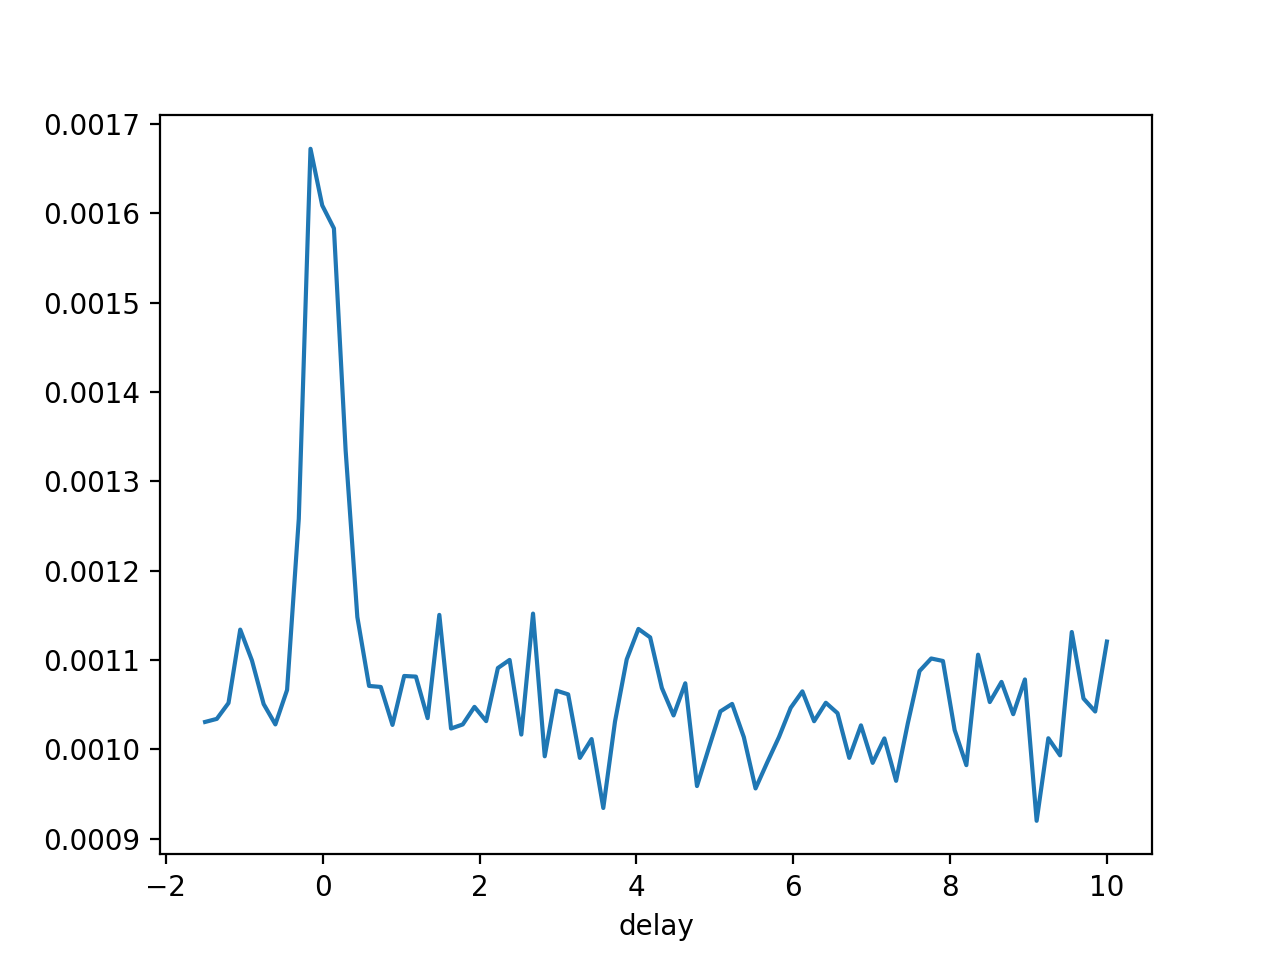

In [303]:
ef_test = fs[83].sel(kp=slice(0.04, 0.07)).sum('kp').sel(eV=slice(-0.2, 0.2))
(ef_test / ef_test.sum('eV')).sel(eV=slice(0.05, 0.1)).sum('eV').plot()

In [ ]:
ef_test = fs[83].sel(kp=slice(0.04, 0.07)).sum('kp').sel(eV=slice(-0.2, 0.2))
ef_test = (ef_test / ef_test.sum('eV')).sel(eV=slice(0.05, 0.1)).sum('eV').values
numpy.fft()

# Convert maps

In [325]:
# f00055
f55 = load_dataset(ds.loc['f00055', ('id',)]).sum('cycle', keep_attrs=True)

/Users/chstansbury/PyCharmProjects/python-arpes/arpes/io.py:116: UserWarning: Could not fetch cleave information.
  warnings.warn('Could not fetch cleave information.')


In [330]:
from arpes.plotting import fermi_surface_slices
f55_k = convert_to_kspace(f55.sel(polar=slice(20, 40)), {'kx': 0.005, 'ky': 0.005})
fermi_surface_slices(f55_k)

/Users/chstansbury/PyCharmProjects/python-arpes/arpes/utilities/conversion/__init__.py:262: RuntimeWarning: invalid value encountered in arcsin
  self.polar = (180 / np.pi) * np.arcsin(ky / np.sqrt(self.k_tot ** 2 - kx ** 2))
/Users/chstansbury/anaconda/envs/python_arpes/lib/python3.5/site-packages/scipy/interpolate/interpolate.py:2469: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
/Users/chstansbury/anaconda/envs/python_arpes/lib/python3.5/site-packages/scipy/interpolate/interpolate.py:2470: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]


:Layout
   .Image.Hyphen_minus_0_eV              :Image   [ky,kx]   (z)
   .Image.Hyphen_minus_0_full_stop_02_eV :Image   [ky,kx]   (z)
   .Image.Hyphen_minus_0_full_stop_04_eV :Image   [ky,kx]   (z)
   .Image.Hyphen_minus_0_full_stop_06_eV :Image   [ky,kx]   (z)
   .Image.Hyphen_minus_0_full_stop_08_eV :Image   [ky,kx]   (z)
   .Image.Hyphen_minus_0_full_stop_1_eV  :Image   [ky,kx]   (z)
   .Image.Hyphen_minus_0_full_stop_12_eV :Image   [ky,kx]   (z)
   .Image.Hyphen_minus_0_full_stop_14_eV :Image   [ky,kx]   (z)
   .Image.Hyphen_minus_0_full_stop_16_eV :Image   [ky,kx]   (z)

In [333]:
# f00055
f73 = load_dataset(ds.loc['f00073', ('id',)])

/Users/chstansbury/PyCharmProjects/python-arpes/arpes/io.py:116: UserWarning: Could not fetch cleave information.
  warnings.warn('Could not fetch cleave information.')


In [334]:
f73_k = convert_to_kspace(f73.sel(polar=slice(20, 40)), {'kx': 0.005, 'ky': 0.005})
fermi_surface_slices(f73_k)

/Users/chstansbury/PyCharmProjects/python-arpes/arpes/utilities/conversion/__init__.py:262: RuntimeWarning: invalid value encountered in sqrt
  self.polar = (180 / np.pi) * np.arcsin(ky / np.sqrt(self.k_tot ** 2 - kx ** 2))
/Users/chstansbury/PyCharmProjects/python-arpes/arpes/utilities/conversion/__init__.py:262: RuntimeWarning: invalid value encountered in arcsin
  self.polar = (180 / np.pi) * np.arcsin(ky / np.sqrt(self.k_tot ** 2 - kx ** 2))
/Users/chstansbury/PyCharmProjects/python-arpes/arpes/utilities/conversion/__init__.py:253: RuntimeWarning: invalid value encountered in arcsin
  return (180 / np.pi) * np.arcsin(kx / self.k_tot)
/Users/chstansbury/anaconda/envs/python_arpes/lib/python3.5/site-packages/scipy/interpolate/interpolate.py:2469: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
/Users/chstansbury/anaconda/envs/python_arpes/lib/python3.5/site-packages/scipy/interpolate/interpolate.py:2470: RuntimeWarning: invalid value encountered in gr

:Layout
   .Image.Hyphen_minus_0_eV              :Image   [ky,kx]   (z)
   .Image.Hyphen_minus_0_full_stop_02_eV :Image   [ky,kx]   (z)
   .Image.Hyphen_minus_0_full_stop_04_eV :Image   [ky,kx]   (z)
   .Image.Hyphen_minus_0_full_stop_06_eV :Image   [ky,kx]   (z)
   .Image.Hyphen_minus_0_full_stop_08_eV :Image   [ky,kx]   (z)
   .Image.Hyphen_minus_0_full_stop_1_eV  :Image   [ky,kx]   (z)
   .Image.Hyphen_minus_0_full_stop_12_eV :Image   [ky,kx]   (z)
   .Image.Hyphen_minus_0_full_stop_14_eV :Image   [ky,kx]   (z)
   .Image.Hyphen_minus_0_full_stop_16_eV :Image   [ky,kx]   (z)

<IPython.core.display.Javascript object>


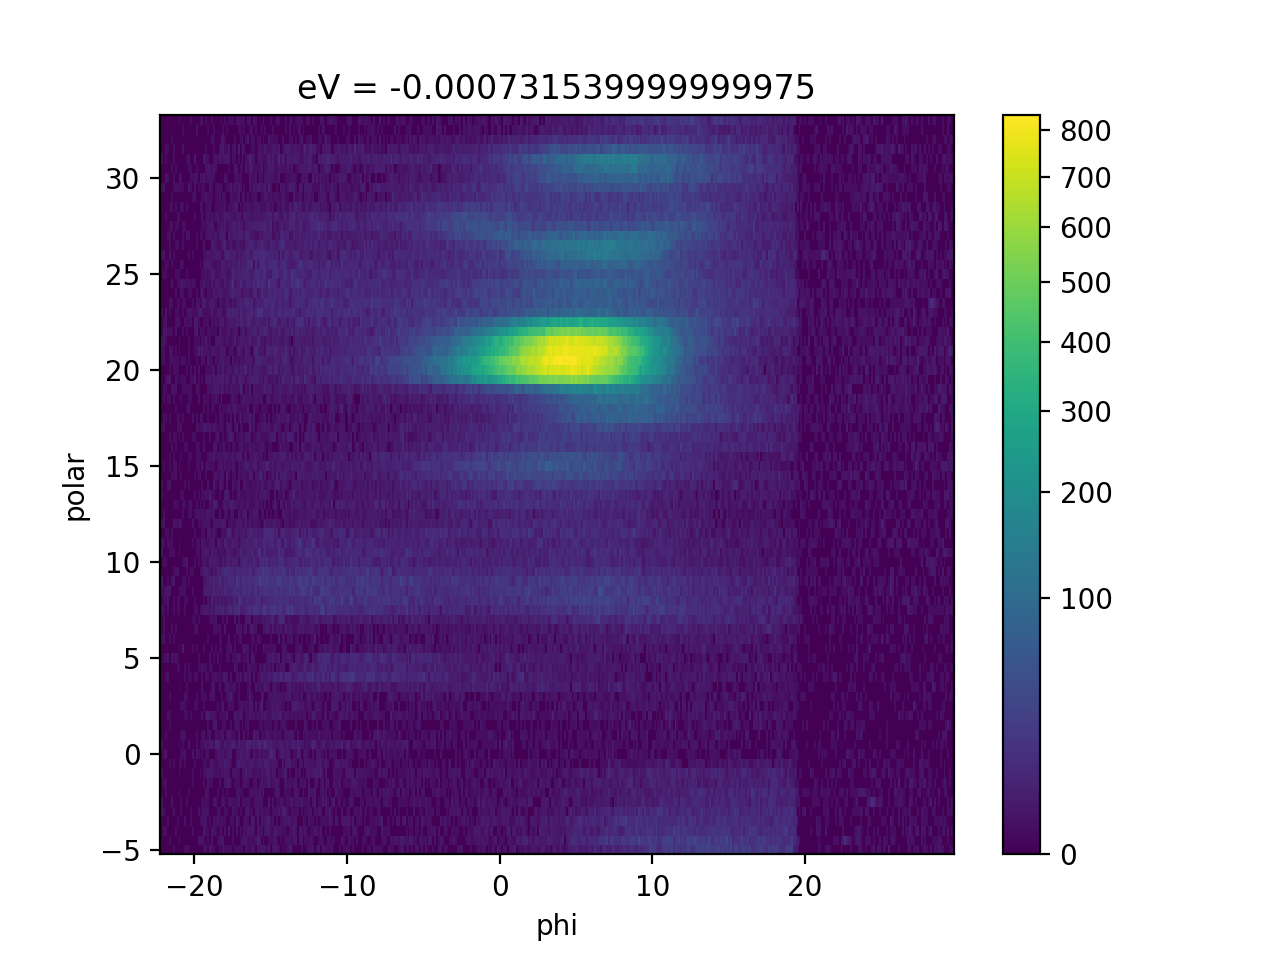

In [337]:
f55.sel(eV=0, method='nearest').plot(norm=colors.PowerNorm(gamma=0.5))